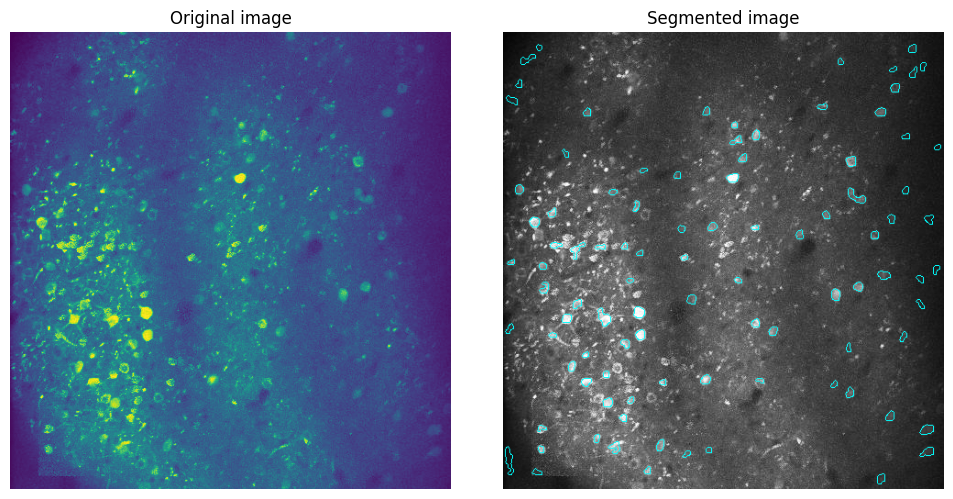

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import statistics

img = cv2.imread('/kaggle/input/image-for-analysis/Image for analysis.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th = cv2.adaptiveThreshold(src=img, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           thresholdType=cv2.THRESH_BINARY, blockSize=55, C=2)
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(src=th, kernel=kernel, iterations=2)
dilation = cv2.dilate(src=erosion, kernel=kernel, iterations=1)
edged = cv2.Canny(dilation, 150, 200)

# creating image with detected cells
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
areas = []
for c in contours:
    area = cv2.contourArea(c)
    areas.append(area)
area_mean = statistics.mean(areas)
out_contours = tuple([i for i in contours if cv2.contourArea(i) >= area_mean])

img_copy = img.copy()
result_img = cv2.cvtColor(img_copy, cv2.COLOR_GRAY2RGB)
cv2.drawContours(image=result_img, contours=out_contours, contourIdx=-1, color=(0, 255, 255), thickness=1)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title('Original image')
axes[0].axis('off') 
axes[1].imshow(result_img)
axes[1].set_title('Segmented image')
axes[1].axis('off') 

plt.tight_layout()  
plt.show()